In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("student-mat.csv")

In [5]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
data["Total_grade"] = data["G1"] + data["G2"] + data["G3"]

In [9]:
data["Total_grade"].mean()

32.037974683544306

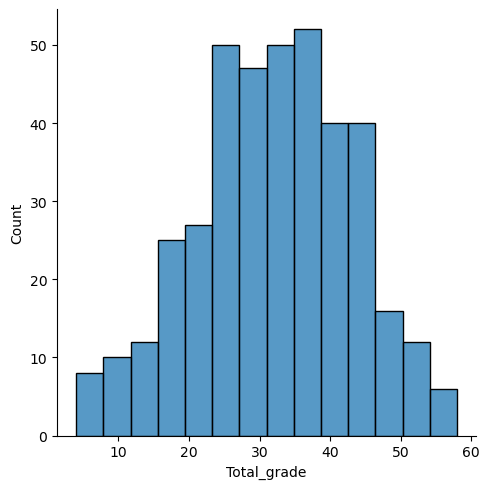

In [11]:
sns.displot(data.Total_grade)

In [16]:
data["Exam_pass"] = [0 if n < 30 else 1 for n in data["Total_grade"]]

<Axes: xlabel='Exam_pass', ylabel='Count'>

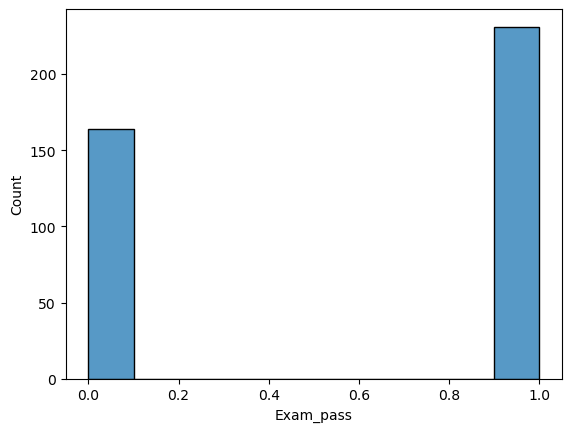

In [21]:
sns.histplot(data["Exam_pass"])

In [22]:
data["Alc"] = data['Dalc'] + data['Walc']

In [40]:
x = data[["Medu","Fedu","Mjob","Fjob","studytime","failures","paid","higher","romantic","Alc","Exam_pass"]]

In [42]:
x["Mjob"] = x["Mjob"].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
x["Fjob"] = x["Fjob"].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
x["paid"] = x["paid"].map({'no': 0, 'yes': 1}).astype(int)
x["higher"] = x["higher"].map({'no': 0, 'yes': 1}).astype(int)
x["romantic"] = x["romantic"].map({'no': 0, 'yes': 1}).astype(int)

C:\Users\vpopv\AppData\Local\Temp\ipykernel_35148\3062148968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Mjob"] = x["Mjob"].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
C:\Users\vpopv\AppData\Local\Temp\ipykernel_35148\3062148968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Fjob"] = x["Fjob"].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
C:\Users\vpopv\AppData\Local\Temp\ipykernel_35148\3062148968.py:3: Set

In [43]:
x

,Medu,Fedu,Mjob,Fjob,studytime,failures,paid,higher,romantic,Alc,Exam_pass
0,4,4,0,4,2,0,0,1,0,2,0
1,1,1,0,2,2,0,0,1,0,2,0
2,1,1,0,2,2,3,1,1,0,5,0
3,4,2,1,3,3,0,1,1,1,2,1
4,3,3,2,2,2,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,3,3,2,2,1,1,0,9,0
391,3,1,3,3,1,0,0,1,0,7,1
392,1,1,2,2,1,3,0,1,0,6,0
393,3,2,3,2,1,0,0,1,0,7,1


In [44]:
x.corr()["Exam_pass"].sort_values(ascending=False)

Exam_pass    1.000000
Medu         0.173378
Fedu         0.167957
higher       0.133482
studytime    0.109185
Mjob         0.057909
Fjob         0.054127
paid         0.053098
romantic    -0.045691
Alc         -0.086500
failures    -0.347227
Name: Exam_pass, dtype: float64

In [49]:
y = x["Exam_pass"]
x = x.drop(["Exam_pass"],axis=1)

In [50]:
x

,Medu,Fedu,Mjob,Fjob,studytime,failures,paid,higher,romantic,Alc
0,4,4,0,4,2,0,0,1,0,2
1,1,1,0,2,2,0,0,1,0,2
2,1,1,0,2,2,3,1,1,0,5
3,4,2,1,3,3,0,1,1,1,2
4,3,3,2,2,2,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...
390,2,2,3,3,2,2,1,1,0,9
391,3,1,3,3,1,0,0,1,0,7
392,1,1,2,2,1,3,0,1,0,6
393,3,2,3,2,1,0,0,1,0,7


In [51]:
import statsmodels.api as sm

In [55]:
X = sm.add_constant(x)

In [56]:
model = sm.Logit(y,X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.604236
         Iterations 6


In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Exam_pass   No. Observations:                  395
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                           10
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.1097
Time:                        20:23:48   Log-Likelihood:                -238.67
converged:                       True   LL-Null:                       -268.08
Covariance Type:            nonrobust   LLR p-value:                 6.055e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5691      0.782     -0.728      0.467      -2.102       0.963
Medu           0.1447      0.142      1.021      0.307      -0.133       0.422
Fedu           0.0933      0.132      0.709      0.478      -0.165       0.351
Mjob          -0.0271      0.103     -0.262      0.793      -0.229       0.175
Fjob           0.1107      0.134      0.828      0.408      -0.152       0.373
studytime      0.1412      0.141      0.999      0.318      -0.136       0.418
failures      -1.0689      0.213     -5.030      0.000      -1.485      -0.652
paid          -0.1380      0.231     -0.597      0.551      -0.591       0.315
higher         0.3277      0.593      0.553      0.580      -0.834       1.489
romantic      -0.0788      0.237     -0.332      0.740      -0.544       0.387
Alc           -0.0260      0.059     -0.445      0.656      -0.141       0.089
==============================================================================
"""

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1]))

Logistic Regression Metrics:
Accuracy: 0.6962025316455697
Precision: 0.6615384615384615
Recall: 0.9555555555555556
F1-score: 0.7818181818181817
ROC-AUC: 0.6826797385620915


In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))



Random Forest Metrics:
Accuracy: 0.6075949367088608
Precision: 0.6458333333333334
Recall: 0.6888888888888889
F1-score: 0.6666666666666667
ROC-AUC: 0.6401960784313725


In [60]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSupport Vector Machine Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:,1]))



Support Vector Machine Metrics:
Accuracy: 0.7088607594936709
Precision: 0.6617647058823529
Recall: 1.0
F1-score: 0.7964601769911505
ROC-AUC: 0.6643790849673203


In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_final.classes_)
disp.plot()
plt.show()

NameError: name 'clf_final' is not defined